<a href="https://colab.research.google.com/github/divya-israni/IEEE---ML-AI/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Flatten
import cv2

from google.colab import drive
drive.mount('/content/drive')

# %matplotline inline

Mounted at /content/drive


In [ ]:
training_data, testing_data = keras.datasets.mnist.load_data()

print(f'Training Data Shape: {training_data[0].shape}')
print(f'Testing Dta Shape: {testing_data[0].shape}')

11490434/11490434 [==============================] - 1s 0us/step
Training Data Shape: (60000, 28, 28)
Testing Dta Shape: (10000, 28, 28)


Image Label: 0


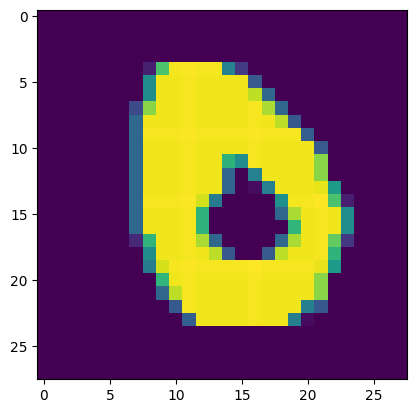

In [ ]:
random_index = np.random.randint(low=0,high=training_data[0].shape[0],size=1,dtype=int) #this is just looking at some random index
random_example = np.squeeze(training_data[0][random_index],axis=0)  #axis=0 means i want to take out the first index (zero)
#0 in first cell for x which is index of random thing, 1 in second for y which is our labels

plt.imshow(random_example)
print(f'Image Label: {training_data[1][random_index][0]}')
plt.show()

In [ ]:
#supervised learning x --> y (f(x)) -- basically it's predicting an output with x, we write the --> to get to y (nueral networks approximates)
train_x = training_data[0] / 255.0    #/ by 255 to scale the numbers down so runtime is faster (easier to work w smaller numbers), 0-255 is the pixel values for images
train_y = training_data[1]            #y is for our labels 0-9 (digits) so we don't want to scale this bc then model will not be able to detect the number

test_X = testing_data[0] / 255.0
test_y = testing_data[1]

In [ ]:
print(f'Shape of X: {train_x.shape}')
print(f'Shape of Y: {train_y.shape}') #after , is 1 python doesn't put

#1 after 60000 bc you are prediciting 1 thing and this is scalar (label is just a vector, which is one column so like one vertical down matrix)
#1 after 60000 bc there is only one column for the labels
#y is like 3[1 4 5] (pretend there is a enter between each digit), inside the [] is the labels you are getting
#these are categorical variables (the labels) we don't care abt the values so they view it w the 0 1 shit so the model can't tell what's bigger and take that into account (makes it bins)
#28 for shape of x bc it is not scalar (28 is the size of the images, 2D)
#60000 is the number of data you have (images)

Shape of X: (60000, 28, 28)
Shape of Y: (60000,)


In [ ]:
train_y = keras.utils.to_categorical(train_y,num_classes=10) #10 bc 0-9, how many digits we are trying to predict
test_y = keras.utils.to_categorical(train_y,num_classes=10)
#this makes y 1 0 bc we want it to be since we have 10 digits?
print(f'{train_y.shape}')

(60000, 10)


In [ ]:
#for nueral netwokrs (which are functions) we do a weighted summation and add a bias to it bc nature has bias so our function should
#we give it x and w for the summation, x is different inputs and w is it's weight(or parameters) (we have to find them) (weight like importance i think)
#activation functions introduce the non linear relationships to our ML models bc functions are like never linear fo predicting stuff
  #one common activation function is ReLU

#building model, sequential tells keras it is fully connected bc every output in each layer goes to the next layer
model = Sequential()
model.add(Input(shape=(28,28))) #always add an input layer so keras knows what to expect (like what shape)
#can only take in vector so make matrix vector, flattening rows and columns by stacking them; vector=28*28 = 784 (this will be our vector since when you stack the images you do 28*28 which is our pixel values)
#(each matrix is 1 image)
model.add(Flatten())

model.add(Dense(units=7,activation='relu')) #dense bc flattened it, these 4 are hidden layers
model.add(Dense(units=50,activation='relu'))
model.add(Dense(units=20,activation='relu'))
model.add(Dense(units=13,activation='relu')) #every nueron uses all these units bc in each layer we're doing the summation thing w 13 units and so on
model.add(Dense(units=10,activation='softmax'))

model.summary()
#output layer, 10 bc 10 digits so 10 classes, softmax gives us probabilites, which we want our last layer to be (does this by e^x(layer)/summation e^x (e^x(layer) for all layers added))
#hidden layers are downstream, output layer is the last layer (middle hidden layers normally 50-100)
#7328 is found by adding how many weights/params we have
#for dense 11 we have 50 neurons and only 7 weights to take in so its 400 (it goes after each other like that), 7 nuerons and 784 weights/params to take it, etc

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 7)                 5495      
                                                                 
 dense_1 (Dense)             (None, 50)                400       
                                                                 
 dense_2 (Dense)             (None, 20)                1020      
                                                                 
 dense_3 (Dense)             (None, 13)                273       
                                                                 
 dense_4 (Dense)             (None, 10)                140       
                                                                 
Total params: 7328 (28.62 KB)
Trainable params: 7328 (28

In [ ]:
#we randomly set our weights (ex. 50, 20), but we want to find them
#lost function tells us how shitty our model is based on weights, want to minimize this
#we want to find the set of weights through the like bottom of the lost function(like imagine that graph when you get near the bottom (graph is like downward parabola from top to bottom))
#we use the chain rule to find the weights in relation to the lost function (derivative tells us how steep it is from hill)
#after finding the weight use gradient descent to update this (the weights) and optimize the function (for this function we set an alpha that shouldn't be too big or small bc it's the steps you take down the hill(lost function)) - we are taking a step down the most steep part (small steps takes too long and big ones overshoots the bottom)

loss_function = 'categorical_crossentropy' #i think we want it to be higher not lower? penalty thing
optimizer = keras.optimizers.SGD(learning_rate=0.01) #runs gradient descent on a randomly selected point/group of points so doesn't take as long (learning rate is alpha)
metrics = ['accuracy']
model.compile(optimizer=optimizer,loss=loss_function,metrics=metrics)

history = model.fit(x=train_x,y=train_y,batch_size=32,epochs=50,shuffle=True) #epochs is how many steps im taking of gradient descent we do, we shuffle the data so the model doesn't memorize the order of the images (each  point is an image)
#batch_size is divinding the data into batch sizes so you don't have to throw the entire data in bc that would take forever

Epoch 1/50
1875/1875 [==============================] - 19s 7ms/step - loss: 1.4453 - accuracy: 0.4921
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5040 - accuracy: 0.8476
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3874 - accuracy: 0.8851
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3479 - accuracy: 0.8965
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3280 - accuracy: 0.9023
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3129 - accuracy: 0.9076
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3017 - accuracy: 0.9094
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2927 - accuracy: 0.9138
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2856 - accuracy: 0.9139
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.27

In [ ]:
model.evaluate(x=train_x,y=train_y,batch_size=32) #had to make it lowercase x not X ??

1875/1875 [==============================] - 8s 4ms/step - loss: 0.1752 - accuracy: 0.9466


[0.1752495914697647, 0.9466000199317932]

Image Label: 2


<function matplotlib.pyplot.show(close=None, block=None)>

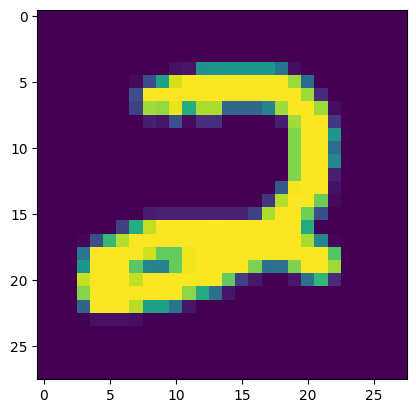

In [ ]:
random_index = np.random.randint(low=0,high=training_data[0].shape[0],size=1,dtype=int)
random_example = np.squeeze(training_data[0][random_index],axis=0)

plt.imshow(random_example)
print(f'Image Label: {training_data[1][random_index][0]}')
plt.show

In [ ]:
prediction = model.predict(random_example.reshape(1,28,28))
print(f'Actual: {training_data[1][random_index][0]}')
print(f'Model Prediction: {np.argmax(prediction)}')

1/1 [==============================] - 0s 103ms/step
Actual: 2
Model Prediction: 2
